In [1]:
# Importing essential Libraries for this project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading and quick view of data 

df = pd.read_csv("BMW sales data (2010-2024) (1).csv")
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [3]:
# Gettting inforamtion about data
print(df.shape)
print(df.info())
print(df.describe())
print(df.columns)

(50000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None
               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  5000

In [4]:
# Checking Duplicates in the data

df.duplicated().sum()

0

In [5]:
# Cardinality & Top Categories

for col in ['Model','Region','Color','Fuel_Type','Transmission','Sales_Classification']:
    print('\n####',col,'####')
    print('unique',df[col].nunique())
    print(df[col].value_counts().head(10))


#### Model ####
unique 11
Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
Name: count, dtype: int64

#### Region ####
unique 6
Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64

#### Color ####
unique 6
Color
Red       8463
Silver    8350
Grey      8348
White     8304
Black     8273
Blue      8262
Name: count, dtype: int64

#### Fuel_Type ####
unique 4
Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64

#### Transmission ####
unique 2
Transmission
Manual       25154
Automatic    24846
Name: count, dtype: int64

#### Sales_Classification ####
unique 2
Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64


Region
Asia             42974277
Europe           42555138
North America    42402629
Middle East      42326620
Africa           41565252
South America    41551818
Name: Sales_Volume, dtype: int64


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'Middle East'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'South America')])

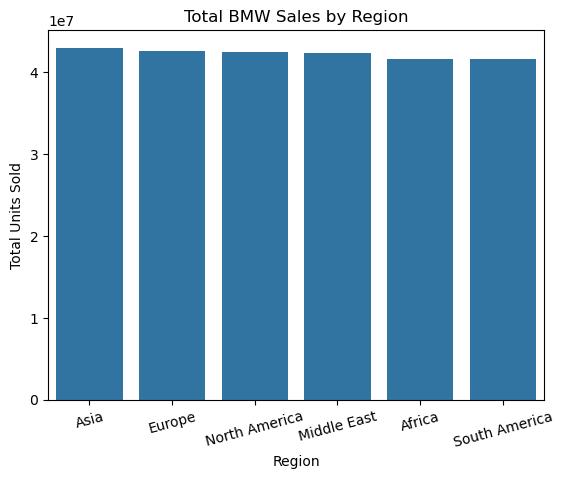

In [6]:
# Finding sales by region

region_sales = df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending = False)
print(region_sales)

# Lets see the Sales visually 


sns.barplot(x=region_sales.index , y=region_sales.values)
plt.title('Total BMW Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=15)

Year
2010    16933445
2011    16758941
2012    16751895
2013    16866733
2014    16958960
2015    17010207
2016    16957550
2017    16620811
2018    16412273
2019    17191956
2020    16310843
2021    16884666
2022    17920946
2023    16268654
2024    17527854
Name: Sales_Volume, dtype: int64


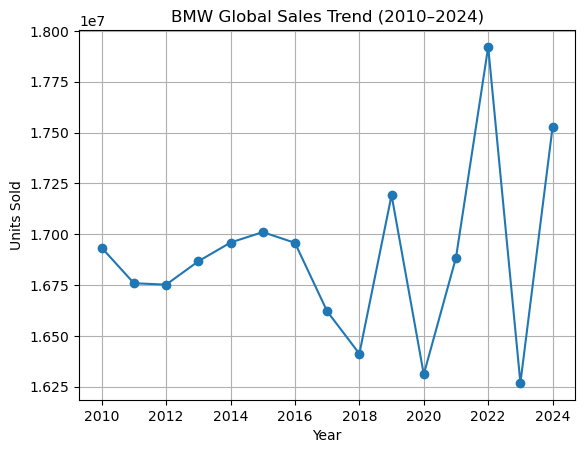

In [7]:
# Sales Trend Over time
sales_trend = df.groupby('Year')['Sales_Volume'].sum()
print(sales_trend)

sales_trend.plot(kind='line',marker='o')
plt.title('BMW Global Sales Trend (2010–2024)')
plt.ylabel('Units Sold')
plt.xlabel('Year')
plt.grid(True)

Fuel_Type   Diesel  Electric   Hybrid   Petrol
Year                                          
2010       4086808   4205554  4415611  4225472
2011       4019361   4345538  4222305  4171737
2012       4087221   4242466  4347806  4074402
2013       4198426   4117556  4278494  4272257
2014       4527336   4022785  4434340  3974499
2015       4193633   4215113  4307029  4294432
2016       4262129   4199882  4111145  4384394
2017       4031905   4116302  4219927  4252677
2018       3892638   4325544  4021011  4173080
2019       4099576   4184558  4461759  4446063
2020       4152177   3962571  4032718  4163377
2021       4137203   4239630  4331469  4176364
2022       4474126   4383912  4687463  4375445
2023       3842804   4305554  4013825  4106471
2024       4356475   4290700  4647195  4233484


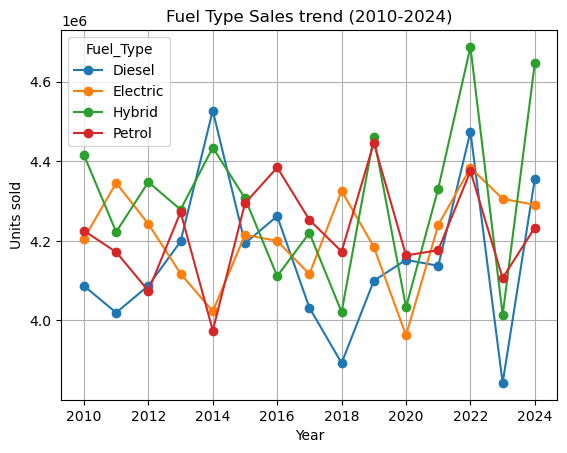

In [8]:
# Fuel trend 

fuel_trend = df.groupby(['Year','Fuel_Type'])['Sales_Volume'].sum().unstack()
print(fuel_trend)


# Lets see Visually

fuel_trend.plot(kind='line',marker='o')
plt.title('Fuel Type Sales trend (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.grid(True)

Model
7 Series    23786466
i8          23423891
X1          23406060
3 Series    23281303
i3          23133849
5 Series    23097519
M5          22779688
X3          22745529
X5          22709749
X6          22661986
M3          22349694
Name: Sales_Volume, dtype: int64


Text(0, 0.5, 'Model')

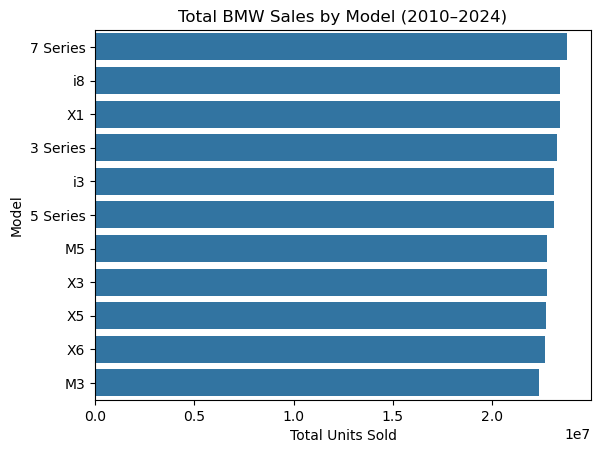

In [9]:
# Let’s see which BMW model leads global sales over all years.

leading_model = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending = False)
print(leading_model)

sns.barplot(x=leading_model.values,y=leading_model.index)
plt.title('Total BMW Sales by Model (2010–2024)')
plt.xlabel('Total Units Sold')
plt.ylabel('Model')

Region
Asia             75554.925006
North America    75070.054709
Europe           74988.356851
South America    74973.598837
Africa           74885.771598
Middle East      74726.788487
Name: Price_USD, dtype: float64


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Middle East')])

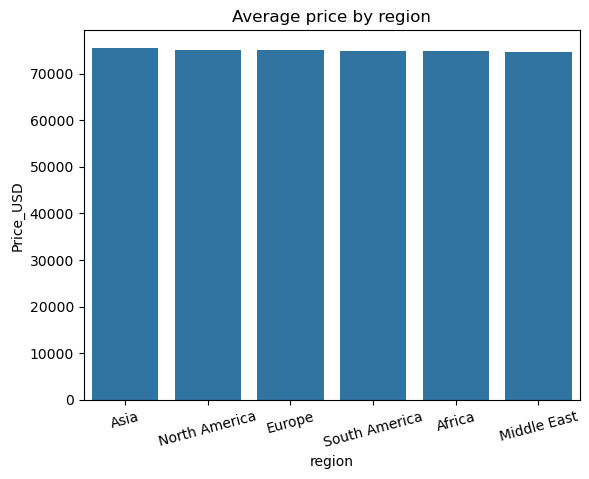

In [10]:
# Average Price by Region

avg_by_region = df.groupby('Region')['Price_USD'].mean().sort_values(ascending = False)
print(avg_by_region)

sns.barplot(x=avg_by_region.index,y=avg_by_region.values)
plt.title('Average price by region')
plt.xlabel('region')
plt.ylabel('Price_USD')
plt.xticks(rotation=15)

Model
7 Series    75570.196742
3 Series    75566.233950
i8          75366.270951
5 Series    75287.844077
X1          75262.219037
X3          75016.616856
M3          74841.588715
i3          74800.268081
X5          74708.116782
M5          74474.930996
X6          74434.600491
Name: Price_USD, dtype: float64


Text(0, 0.5, 'Model')

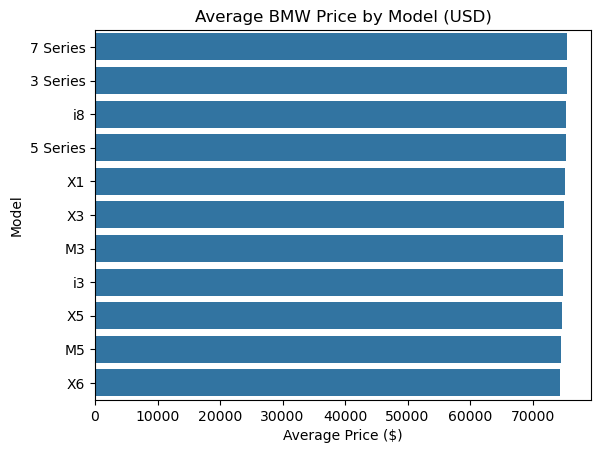

In [11]:
# Let’s find which BMW model has the highest average selling price.

model_price = df.groupby('Model')['Price_USD'].mean().sort_values(ascending = False)
print(model_price)

sns.barplot(y=model_price.index,x=model_price.values)
plt.title('Average BMW Price by Model (USD)')
plt.xlabel('Average Price ($)')
plt.ylabel('Model')

Text(0, 0.5, 'Price (USD)')

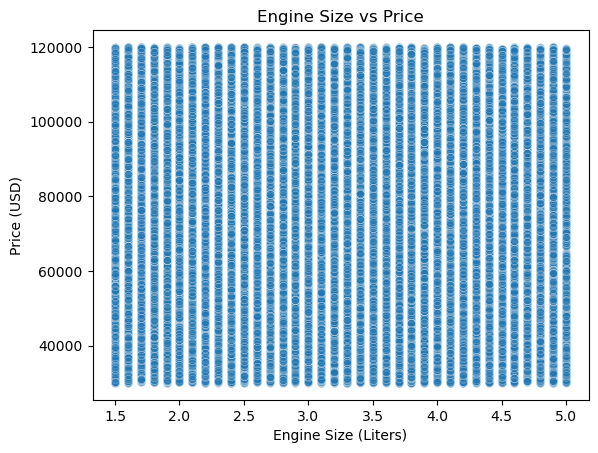

In [12]:
# Relationship Between Engine Size and Price

sns.scatterplot(x='Engine_Size_L',y='Price_USD',data=df,alpha=0.4)
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Price (USD)')

In [13]:
print(df.groupby('Engine_Size_L')['Price_USD'].mean())

Engine_Size_L
1.5    74680.549296
1.6    74801.096369
1.7    75102.728491
1.8    74099.338256
1.9    75174.268525
2.0    74812.071277
2.1    76116.761740
2.2    74631.157895
2.3    74028.732591
2.4    75293.582187
2.5    75667.323688
2.6    75416.538095
2.7    74527.366391
2.8    75336.090511
2.9    74621.145965
3.0    75102.963380
3.1    74072.150943
3.2    75227.321879
3.3    75277.593113
3.4    75800.002114
3.5    75322.998621
3.6    76263.543085
3.7    74767.883786
3.8    75356.576439
3.9    75923.876491
4.0    74391.446403
4.1    75313.005630
4.2    76170.331744
4.3    74455.973315
4.4    75710.490358
4.5    73109.520000
4.6    75176.163701
4.7    75613.460472
4.8    74313.780014
4.9    75260.385084
5.0    73261.757953
Name: Price_USD, dtype: float64


# Lets make Sales_Classification prediction model

In [14]:
from sklearn.preprocessing import LabelEncoder
df_ml =df.copy()
cat_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    encoders[col] = le
df_ml.head()    


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,1,2016,1,3,3,1,3.5,151748,98740,8300,0
1,10,2013,4,3,2,0,1.6,121671,79219,3428,1
2,1,2022,4,1,3,0,4.5,10991,113265,6994,1
3,6,2024,3,1,3,0,1.7,27255,60971,4047,1
4,2,2020,5,0,0,1,2.1,122131,49898,3080,1


In [15]:
# Split Features & Target

from sklearn.model_selection import train_test_split

x= df_ml.drop(columns=['Sales_Classification'])
y=df_ml['Sales_Classification']

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [16]:
# Train a Decision Tree

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42,max_depth=8)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3049
           1       1.00      1.00      1.00      6951

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

[[3049    0]
 [   0 6951]]


Sales_Volume     1.0
Model            0.0
Year             0.0
Region           0.0
Color            0.0
Fuel_Type        0.0
Transmission     0.0
Engine_Size_L    0.0
Mileage_KM       0.0
Price_USD        0.0
dtype: float64


Text(0.5, 1.0, 'Feature Importance in Sales Classification')

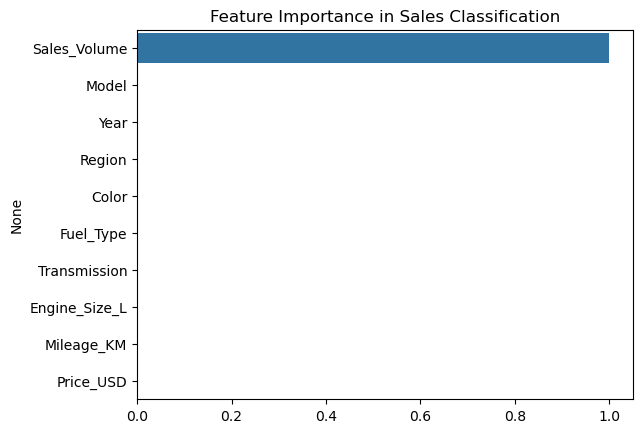

In [21]:
feat_importance = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)

print(feat_importance)

sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title('Feature Importance in Sales Classification')
